<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F450%2F1*CXZ804tKLPy2hiikJbYH3w.png&f=1&nofb=1" width=30% ></center>

 # <center> Assignment 4: Image Alignment and Stitching </center>
<center> Computer Vision 1, University of Amsterdam </center>
    <center> Due 23:59, October 7, 2023 (Amsterdam time) </center>
    
***

<center>
<b>TA's: Weijie Wei, Milena Kapralova, Satchit Chatterji</b>

Student1 ID: \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )
</center>


# General Guidelines

Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 4 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=CV1_environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.

Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**


# Assignment-specific guidelines

This assignment is divided into two parts: Image Alignment (Question 1 and 2) and Image Stitching (Question 3). To help you start the assignment, we include an example output for *keypoint matching, warping and image stitching* in the `./images/` folder, under `example result 1, 2 and 3`, respectively. This should serve as a guideline for what solutions we are looking for.

**Important: For this assignment, you are not allowed to use some APIs such as cv2.stitcher that implements image stitching for you directly. You can use other APIs that implement only certain functionalities, such as keypoint matching.**

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
print(cv2.__version__)

3.4.2


In [2]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.2" or cv2.__version__ == "3.4.2.17", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
sift = cv2.xfeatures2d.SIFT_create()
# Proceed to the next cell if you don't get any error.

____

 # Image Alignment *(60pts)*

In this practice, you will write a function that takes two images as
input and computes the affine transformation between them. You will work
with supplied *street* images. The overall scheme is as follows:

  1.  Detect interest points in each image.

  2.  Characterize the local appearance of the regions around interest
      points.

  3.  Get the set of supposed matches between region descriptors in each
      image.

The first three steps can be performed using David Lowe's SIFT. Check
out the Docs of SIFT related function for further information in the
following link:
<https://docs.opencv.org/3.4.2/da/df5/tutorial_py_sift_intro.html> and
<https://docs.opencv.org/3.4.2/d5/d3c/classcv_1_1xfeatures2d_1_1SIFT.html>.

4.  Perform RANSAC to discover the best transformation between images. RANSAC should be performed as follows:

*   Repeat $N$ times:

  * Pick $P$ matches at random from the total set of matches $T$.

  * Construct a matrix $A$ and vector $b$ using the $P$ pairs of points and find affine transformation parameters $(m1, m2, m3, m4, t1, t2)$ (see [Question 2.1](#q2.1)) by solving the equation $Ax = b$. Such equation can be solved using the pseudo-inverse: $x = (A^T A)^{-1} A^T b$, or packages of Numpy in Python.

  * Using the transformation parameters, transform the locations of all $T$ points in image1. If the transformation is correct, they should lie close to their counterparts in image2.
      
  * Count the number of inliers, where inliers are defined as the number of transformed points from image1 that lie within a radius of $10$ pixels of their pair in image2.

  * If this count exceeds the best total so far, save the transformation parameters and the set of inliers.

5. To observe the RANSAC performance quatitatively, plot the two images side by side with a line connecting the original $T$ points in image1 and transformed $T$ points over image2.

6. Finally, transform image1 using this final set of transformation parameters. If you display this image, you should find that the pose of the object in the scene should correspond to its pose in image2. To transform the image, implement your own function based on **nearest-neighbor interpolation**. Then you might use the OpenCV built-in function `cv2.warpAffine` and compare your results.<br>
Note, nearest neighbors does not mean you have to classify points. The problem is that if you have a transformation, then the transformed points may not be at perfect pixels (e.g., 0.3px). Instead of linear interpolation, which requires more work to implement, we can just use nearest neighbors which means simply **rounding the coordinates**.

 ## Question 1 *(50 pts)*

 ### Question 1.1 *(10 pts)*

Create a function that takes image pairs `sp1.png` and `sp2.png` as input, and return the keypoint matchings between the two images. <br><br>
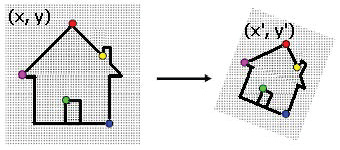

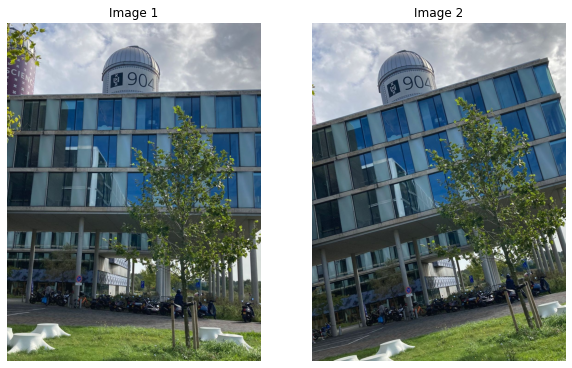

In [3]:
img1_path = "images/sp1.jpg"
img2_path = "images/sp2.jpg"

# Open images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Note: OpenCV uses BGR instead of RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display images
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Image 1')
ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title('Image 2')
plt.show()
plt.close()

**Note:** For some patent issue, the newest version of OpenCV does not contain SIFT-related functions. Therefore, the provided environment uses an older version of the pacakge (`opencv-contrib-python==3.4.2.17`). If you can't run the cell below, make sure you are using the `cv1` python environment.

In [4]:
def keypoint_matching(image1, image2):
  """
    Given two input images, find and return the matching keypoints.
    Arguments:
    image1: the first image (in RGB)
    image2: the second image (in RGB)
    Returns:
    The keypoints of image1, the keypoints of image2 and the matching
    keypoints between the two images
  """

  print('\nFinding matching features...')
  # ================
  # Your code here
  # ================
  sift = cv2.xfeatures2d.SIFT_create()

  keypoints_1, descriptors_1 = sift.detectAndCompute(image1, None)
  keypoints_2, descriptors_2 = sift.detectAndCompute(image2, None)

  bf = cv2.BFMatcher()
  matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)

  good_matches = []
  for m, n in matches:
      if m.distance < 0.75 * n.distance:
          good_matches.append(m)

  print("Number of keypoints in image 1:        ", len(keypoints_1))
  print("Number of keypoints in image 2:        ", len(keypoints_2))
  print("Number of keypoints after matching:    ", len(good_matches), "\n")

  return keypoints_1, keypoints_2, good_matches

In [5]:
# Find and match key points
keypoints_1, keypoints_2, matches = keypoint_matching(img1,img2)


Finding matching features...
Number of keypoints in image 1:         10664
Number of keypoints in image 2:         11412
Number of keypoints after matching:     5276 



 ### Question 1.2 *(10 pts)*
Take a random subset (with set size set to 10) of all matching points, and plot on the image. Connect matching pairs with lines. You can assign a random color to each line to make them easier to distinguish.

In [5]:
# Extract 10 random matches to plot
random_matches = [matches[i] for i in random.sample(range(0, len(matches)), 10)]

# TODO: Now plot them. Hint: for generating the plot, you can use cv2.drawMatches()
# ================
# Your code here
# ================
output_image = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, random_matches, None)
cv2.imshow('Random Matches', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

 ### Question 1.3 *(30 pts)*
Create a function that performs the RANSAC algorithm as explained above. The function should return the best transformation found. For visualization, show the transformations from image1 to image2 and from image2 to image1.

In [6]:
# Complete the function below. Use it in the `ransac` function and/or 'visualization' function.
def affine_transform(img, mat, warp='forward'):
  """
  Arguments:
    img: the first/second image (img1 or img2)
    mat: transformation matrix
    warp: forward or inverse warping
  Returns:
    transformed image
  """

  # =========================
  # YOUR CODE HERE IF NEEDED
  # =========================
  height, width, _ = img.shape

  if warp =='forward':
    # =========================
    # YOUR CODE HERE
    # =========================
    output = cv2.warpAffine(img, mat, (width, height))


  if warp == 'inverse':
    # =========================
    # YOUR CODE HERE
    # =========================
    inverse_matrix = np.linalg.inv(mat)
    output = cv2.warpAffine(img, inverse_matrix, (width, height))



  return output

In [29]:
def ransac(kp1, kp2, matches, N):
  """
    Apply RANSAC to filter out the outliers. See the pseudocode provided at
    the beginning of this section for some guidance.
    Arguments:
      kp1: the keypoints of img1
      kp2: the keypoints of img2
      matches: the matching kp1 and kp2
      N: number of iterations
    Returns:
      the best transformation matrix
  """

  # ================
  # YOUR CODE HERE
  # ================
  best_matrix = None
  best_inliers = 0
  threshold = 10

  for i in range(N):
    random_matches = random.sample(matches, 4)

    A = []
    b = []

    for match in random_matches:
      x1, y1 = kp1[match.queryIdx].pt
      x2, y2 = kp2[match.trainIdx].pt

      A.append([x1, y1, 0, 0, 1, 0])
      A.append([0, 0, x1, y1, 0, 1])

      b.extend([x2, y2])

    A = np.array(A)
    b = np.array(b).reshape(-1, 1)  

    try:
        x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    except np.linalg.LinAlgError:
        continue
    x = x.reshape((2, 3))
    
    # transformed_kp1 = []
    # for kp in kp1:
    #   x1, y1 = kp.pt
    #   x2 = x[0] * x1 + x[2] * y1 + x[4]
    #   y2 = x[1] * x1 + x[3] * y1 + x[5]
    #   transformed_kp1.append((x2, y2))

    # inliers = 0
    # for i in range(len(matches)):
    #   x1, y1 = transformed_kp1[i]
    #   x2, y2 = kp2[matches[i].trainIdx].pt
    #   distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    #   if distance < threshold:
    #     inliers += 1  
     
    inliers = 0
    for match in matches:
        x1, y1 = kp1[match.queryIdx].pt
        x2, y2 = kp2[match.trainIdx].pt
        point1 = np.array([x1, y1, 1]).reshape(-1, 1)
        transformed_point1 = np.dot(x, point1)
        error = np.sqrt((transformed_point1[0] - x2) ** 2 + (transformed_point1[1] - y2) ** 2)
        print(error)
        if error < threshold:
            inliers += 1     

    if inliers > best_inliers:  
      best_inliers = inliers
      best_matrix = x
    

  print("Total number of matches: ", len(matches))
  print("Inliers found:           ", best_inliers)
  print("Outliers removed:        ", len(matches) - best_inliers)

  return best_matrix

In [30]:
def visualization(src_img, ref_img, best_matrix):
  """
  Given the source image and the reference image, visualize:
  1. The transformed src image using the forward warping
  2. The transformed src image using the inverse warping
  3. The transformed src image using OpenCV's warpAffine function
  4. The original reference image
  Arguments:
    - src_img: the image to transform
    - ref_img: the referenced image to transform to
    - best_matrix: the best transformation matrix
  """
  # NOTE: if you input a colored image, it expects RGB and not BGR colors.

  # ================
  # YOUR CODE HERE
  # ================
  transformed_forward = affine_transform(src_img, best_matrix, warp='forward')
  #transformed_inverse = affine_transform(src_img, best_matrix, warp='inverse')
  transformed_opencv = cv2.warpAffine(src_img, best_matrix, (ref_img.shape[1], ref_img.shape[0]))


  cv2.imshow('Forward Warping', transformed_forward)
  #cv2.imshow('Inverse Warping', transformed_inverse)
  cv2.imshow('OpenCV WarpAffine', transformed_opencv)
  cv2.imshow('Reference Image', ref_img)

  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [31]:
N_iterations = 100 # RANSAC iterations. Experiment with this value!

# TODO: Use the functions defined above to match the keypoints, filter the outliers and
# visualize the results. Show the transformations from image1 to image2 and from image2 to image1.

# ================
# YOUR CODE HERE
# ================
keypoints_1, keypoints_2, matches = keypoint_matching(img1,img2)
best_matrix = ransac(keypoints_1, keypoints_2, matches, N_iterations)
#visualization(img1, img2, best_matrix)



Finding matching features...
Number of keypoints in image 1:         10664
Number of keypoints in image 2:         11412
Number of keypoints after matching:     5276 

[201176.97639084]
[171103.02781132]
[120627.89302983]
[171445.83349808]
[201346.56276104]
[200709.39286241]
[57150.49098723]
[170199.05617918]
[111015.90033346]
[110433.61268635]
[199407.53498212]
[112343.66565405]
[201548.70476601]
[199921.51541707]
[108073.32780245]
[170163.14245547]
[185822.1569522]
[111520.43340925]
[176611.73708368]
[195507.17100215]
[188700.21089774]
[227192.92783925]
[107705.01518584]
[107070.70074426]
[181279.11463756]
[175503.19110973]
[108023.62772383]
[194661.54384586]
[137420.25082931]
[188988.14809174]
[107526.1479816]
[132089.43639992]
[132089.43639992]
[175952.25308951]
[180824.18171016]
[106855.34510281]
[107066.61231293]
[166576.62015145]
[198728.56067611]
[4100.10828466]
[173109.25288483]
[176570.21466689]
[96965.50261429]
[96133.86015421]
[191329.65889462]
[166893.25696932]
[7372.7236

KeyboardInterrupt: 

 ## Question 2 *(10 pts)*
Based on the results, answer the following questions.

<a name="q2.1"></a>
 ### Question 2.1 *(2 pts)*
How many matches do we need to solve an affine transformation which can be formulated as follows:

$$
\begin{bmatrix}
x'\\y'\end{bmatrix} =
\begin{bmatrix}
m_1 & m_2\\
m_3 & m_4
\end{bmatrix}
\begin{bmatrix}
x\\y\end{bmatrix}+
\begin{bmatrix}
t_1\\t_2\end{bmatrix}
$$

The equation above can be rewritten as:

$$
\begin{bmatrix}
x&y&0&0&1&0\\
0&0&x&y&0&1\end{bmatrix}
\begin{bmatrix}
m_1\\
m_2\\
m_3\\
m_4\\
t_1\\
t_2
\end{bmatrix} =
\begin{bmatrix}
x'\\y'\end{bmatrix}
$$
or, alternatively:
$$
Ax=b, \;
A = \begin{bmatrix}
x&y&0&0&1&0\\
0&0&x&y&0&1\end{bmatrix}, \;
x = \begin{bmatrix}
m_1\\
m_2\\
m_3\\
m_4\\
t_1\\
t_2
\end{bmatrix}, \;
b = \begin{bmatrix}
x'\\y'\end{bmatrix}
$$

For this affine transformation where A is a 2x6 matrix and there are 6 unknowns. We need 6 matches.

 ### Question 2.2 *(4 pts)*
What if we have more matches than the minimum requirement? Will it work in code and why?

If we have more than 6 matches the code will still work. And it could even be advantageous because it could increase the robustness and accuracy

 ### Question 2.3 *(4 pts)*
How many iterations are needed to find good transformation parameters? Please explain your answer with the support of a table or figures.

The quality of the data, the quantity of outliers, and the threshold used to identify inliers are a few of the variables that might affect how many rounds RANSAC requires to find suitable transformation parameters. 
You could use this formula to identify the number of outliers: N= log(1 - P)/ log(1 - W**n).
Where N is the number of iterations. P is the desired probability of finding a good solution. W is the proportion of inliers in your dataset. n is the number of data points sampled in each iteration. This formula would suggest that if W would increase you would have less number of iterations

____

 # Image Stitching *(40pts)*

In this exercise, you will write a function that takes two images as input and stitches them together. The method described in the previous section will be used to stitch two images together by transforming one of them to the coordinate space of the other. You will work with the supplied images *left.jpg* and *right.jpg*. The overall scheme can be summarized as follows:

1.   As in the previous task you should first find the best transformation between input images.

2.   Then you should estimate the size of the stitched image.

3.   Finally, combine the transformed image with the other one into one image.

**Note:** Only one example output is given (see `images/example result 3 - stitched image.png`). But you are required to do both, *i.e.*, transforming the *left.jpg* to the coordinate space of *right.jpg* and vice versa. Do not cut transformed images but pad the stitched images instead.

 ### Question 3.1 *(35 pts)*
Create a function that takes an image pair as input, and returns the stitched version.

In [ ]:
def stitchImages(img1, img2, N=800):
  """
  Given two input images, return the stitched image.
  Arguments:
    img1: the first image (in RGB)
    img2: the second image (in RGB)
    N: number of iterations for RANSAC
  Returns:
    The stitched image of the two images
  """
  # TODO: 1. Find the best transformation.

  # TODO: 2. Estimate the size of the stitched image.
  # Hint: Calculate the transformed coordinates of corners of the *right.jpg*

  # TODO: 3. Combine the *left.jpg* with the transformed *right.jpg* into one image.
  # When you call cv2.warpAffine() you have to input the destination size. But it can happen that the new
  # coordinates of a pixel - upon transformation - are negative, e.g. (-10,0). In that case they  won't show up
  # in the output image. We have to introduce padding, an additional translation to the calculated affine
  # transoformation.

  # ================
  # YOUR CODE HERE
  # ================
  raise NotImplementedError

  return stitched_img

In [ ]:
img1_path = "images/left.jpg"
img2_path = "images/right.jpg"

# Load images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Note: OpenCV uses BGR instead of RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Stitch images
stitchedImage1 = stitchImages(img1, img2, 100)
stitchedImage2 = stitchImages(img2, img1, 100)

plt.imshow(stitchedImage1)
plt.axis('off')
plt.show()
plt.close()

 ### Question 3.2 *(5 pts)*
Visualize the stitched image alongside with the original image pair.

In [ ]:
# TODO: Visualize the stitched images and the original images.

# ================
# YOUR CODE HERE
# ================
raise NotImplementedError

 # Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

 # -End of Notebook-